### Student performance index, dataset analysis

In [25]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
# load data
df = pd.read_csv("Student_Performance.csv")

In [27]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


### OUR GOAL: what are the most important features that affect the performance index (also, which variables are not that useful)

In [28]:
# let's study basic statistics, 10000 rows of data here
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


<Axes: xlabel='Performance Index', ylabel='Count'>

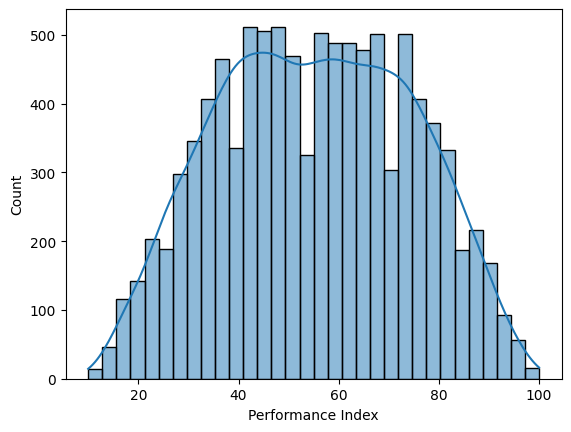

In [29]:
# very symmetric dataset, looks very synthetic....
sns.histplot(df['Performance Index'], kde=True)

### Pair plots without hue are usually quite limited...

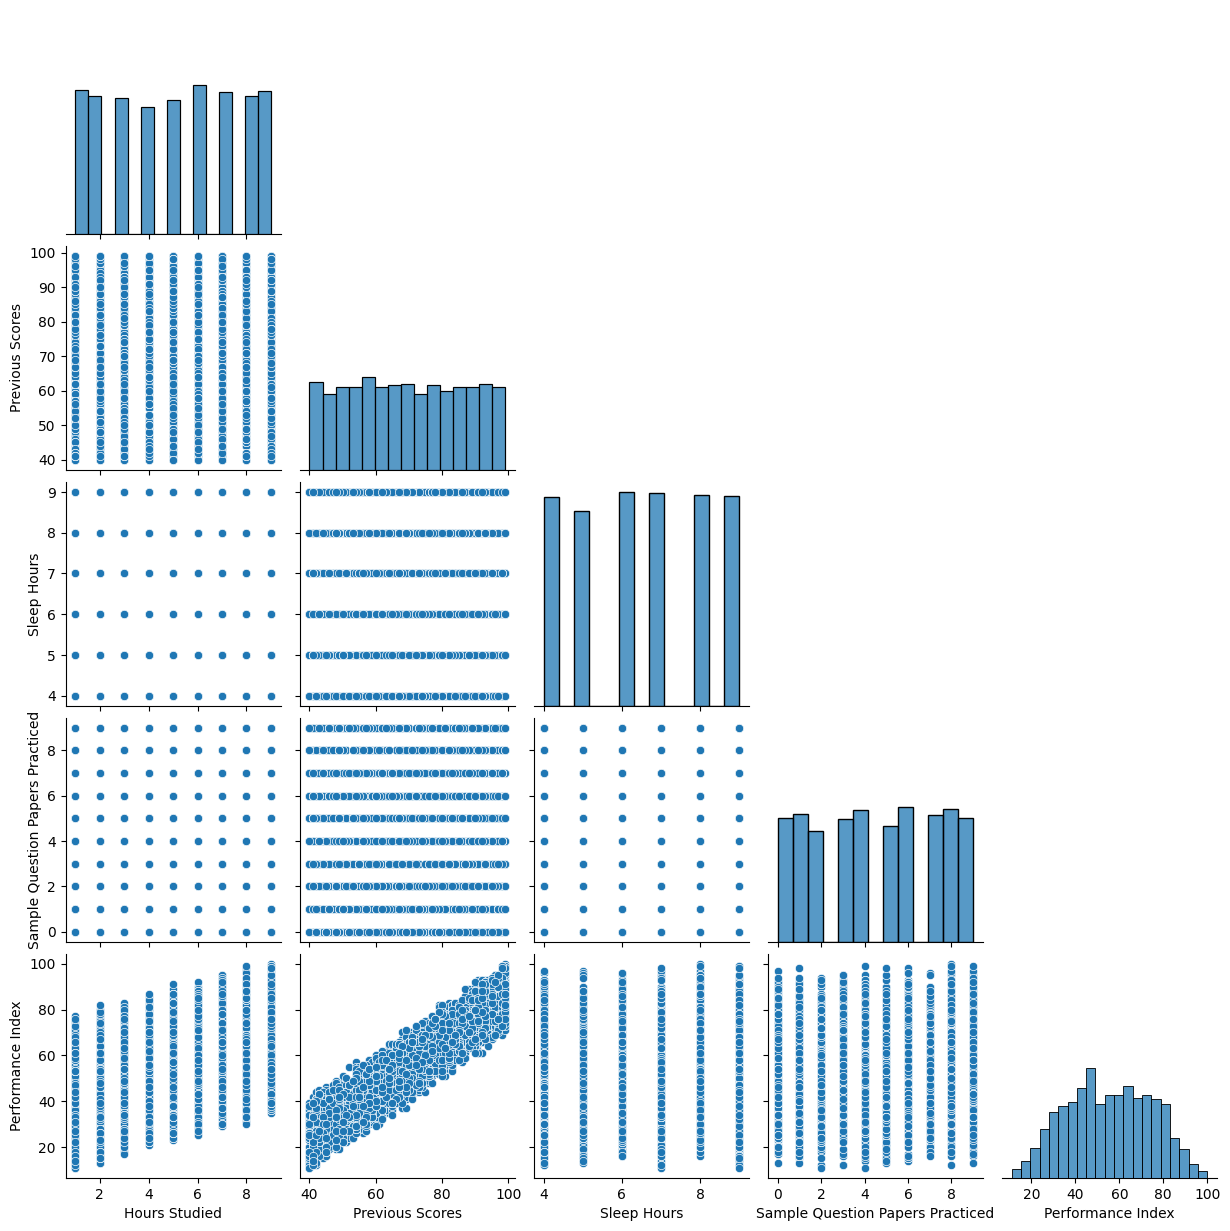

In [30]:
# if you have too much data, might be a good idea to take a smaller sample
# for easier visualizations in seaborn (too much data => visualization might clutter)
df_sample = df.sample(3000)
sns.pairplot(df_sample, corner=True)

Again, very symmetric, probably synthetic. 

### Pair plot, hue on Hours Studied, we can see some strong connection between Performance Index, Previous Scores and Hours Studied

In [31]:
# let's see the column names quickly, so what can we use in the plots
df.head(1)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0


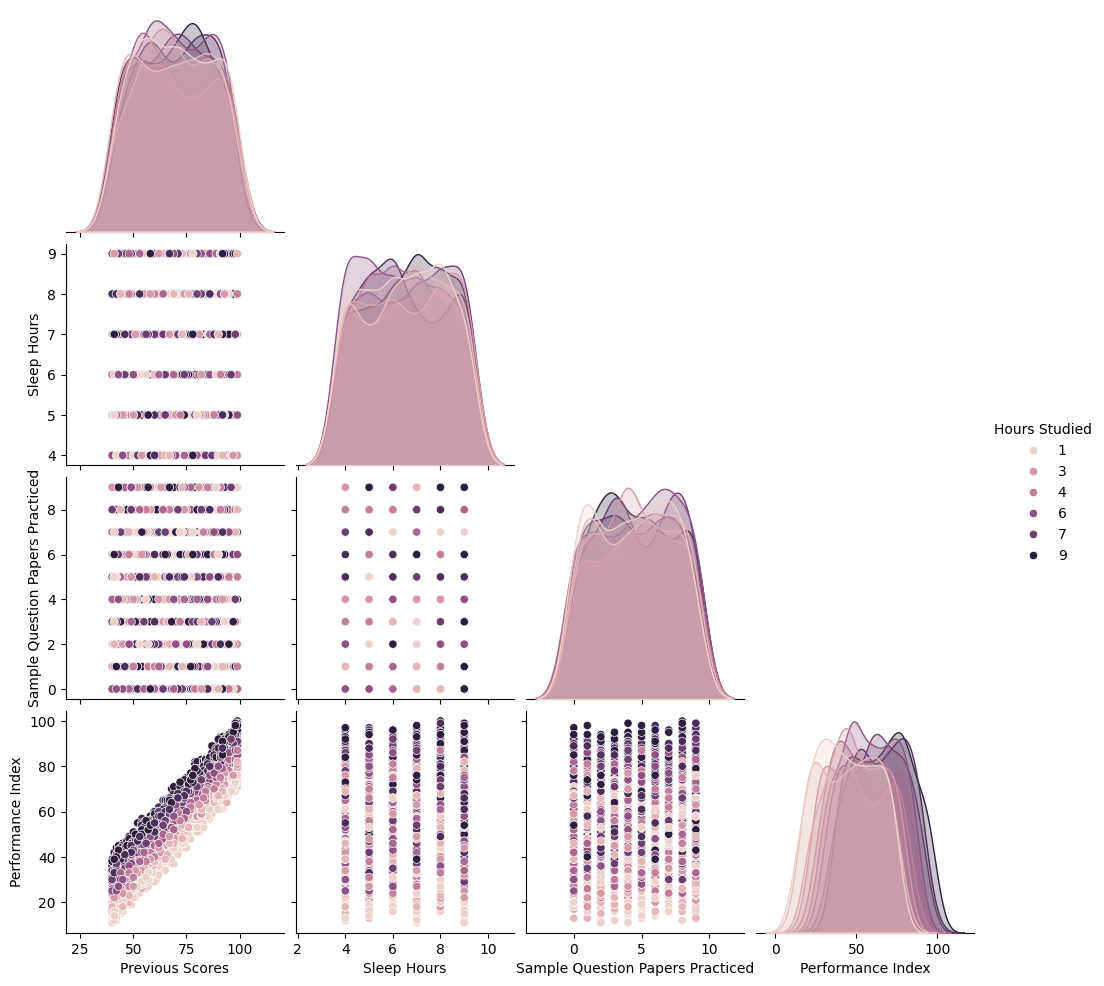

In [32]:
# let's use Hours studied as the hue
sns.pairplot(df_sample, corner=True, hue="Hours Studied")

**Aha, it seems the data is based on Previous Scores + Hours studied, the gradient in the data (bottom left corner) looks so clean and smooth, this dataset is definitely a synthetic dataset.**

### Extracurricular activities seem to be all over the place, probably no connections here...

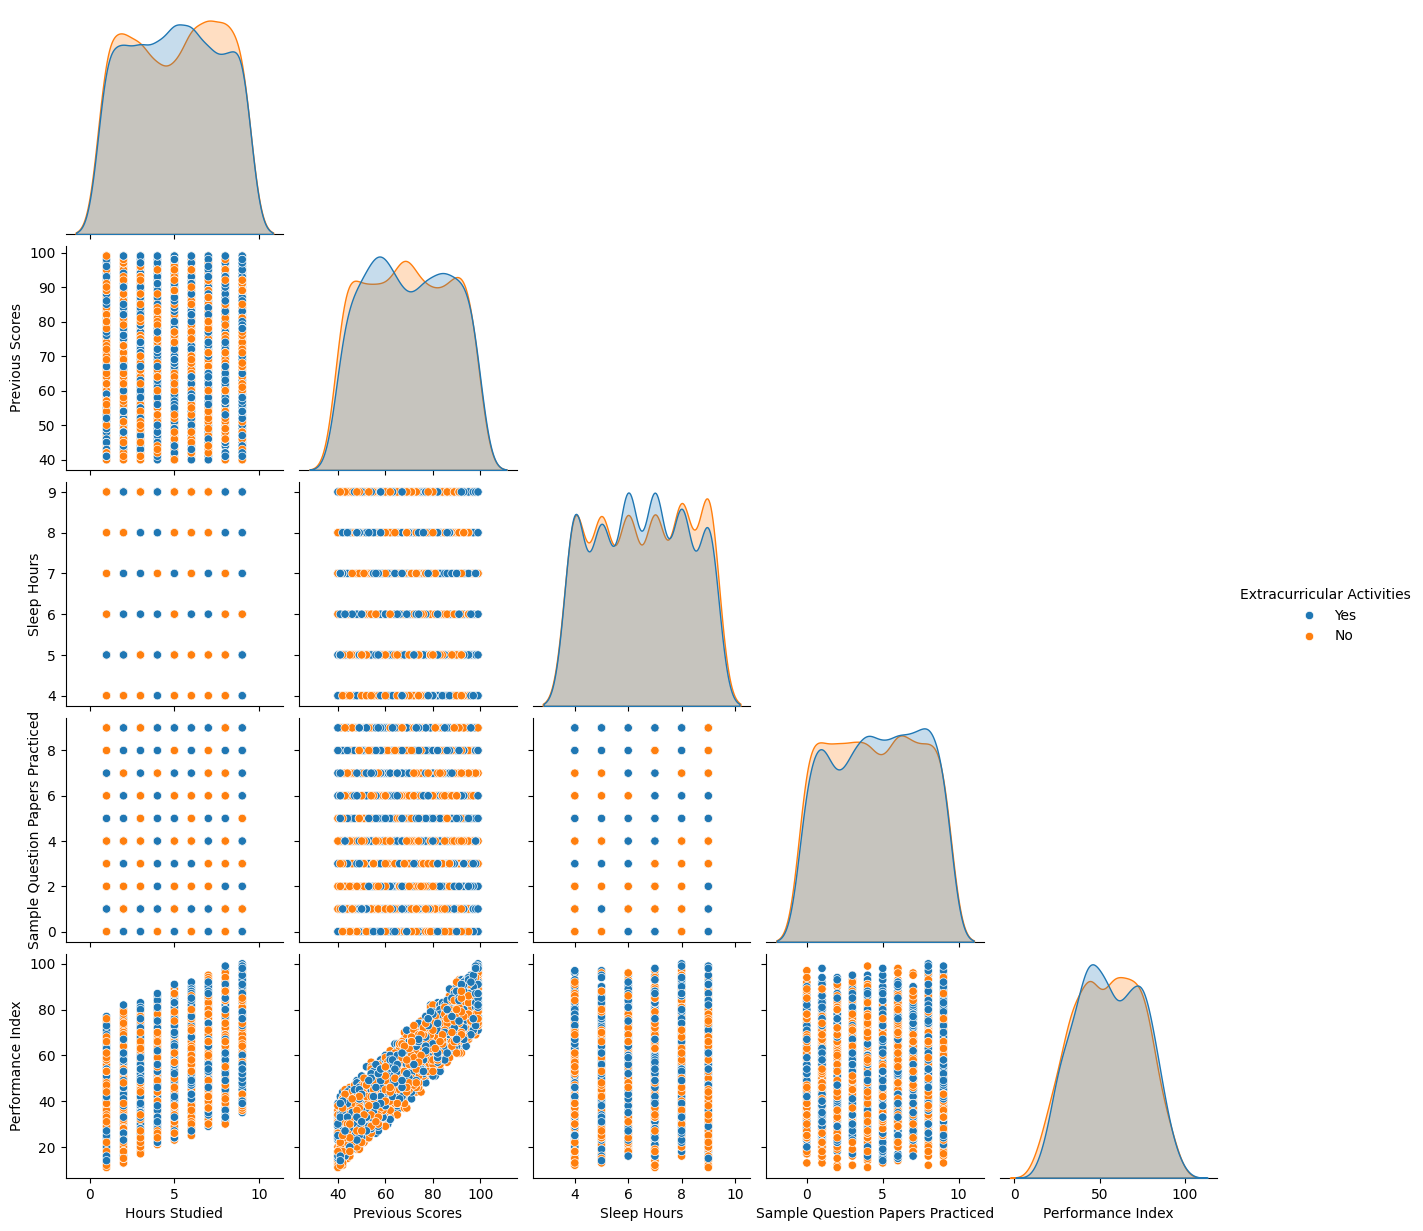

In [33]:
# let's try this too
sns.pairplot(df_sample, corner=True, hue="Extracurricular Activities")

### Cant' really see nothing in the plot above, probably just random noise.

**How about the sleep hours?**

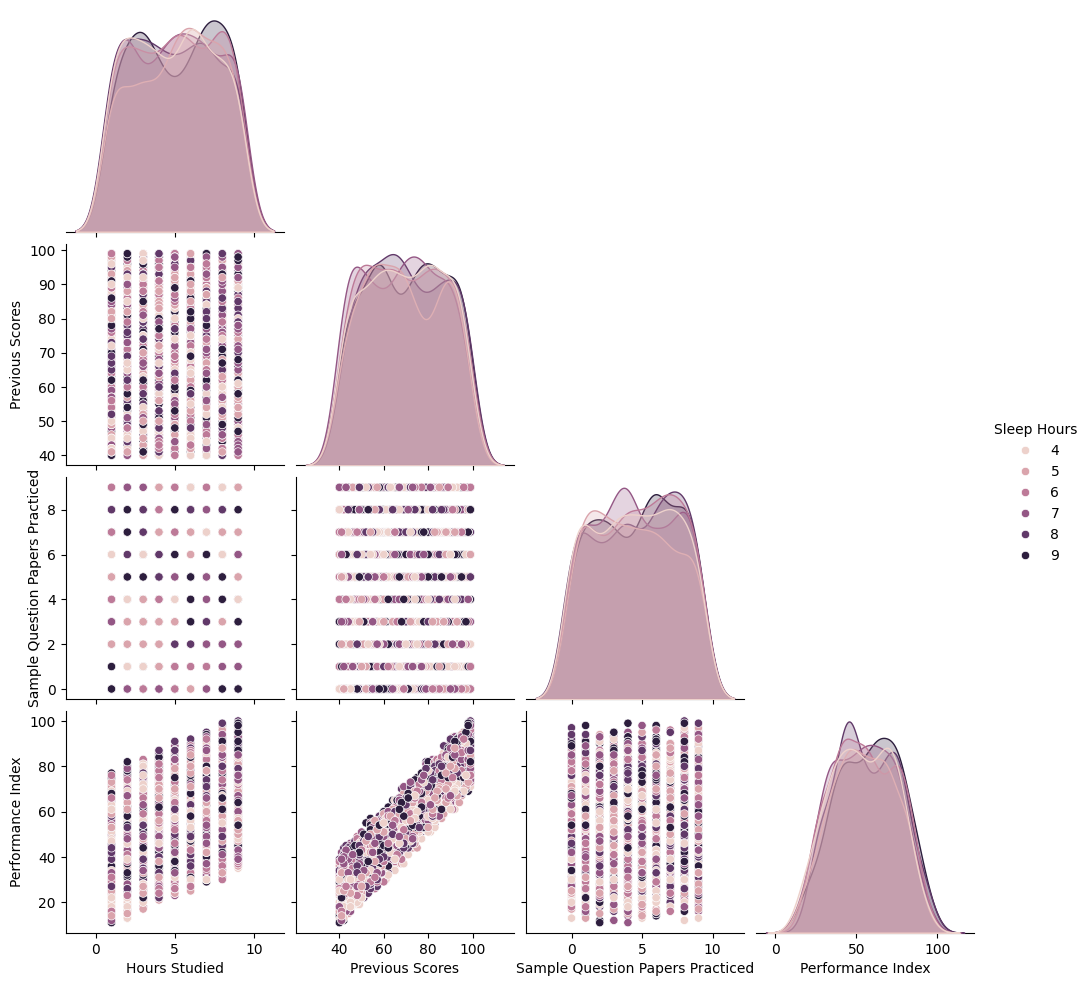

In [34]:
# let's try sleep hours too
sns.pairplot(df_sample, corner=True, hue="Sleep Hours")

### It's not as bad as with the extracurricular activities, but can't really see much connection in the sleep hours...

### This shows a very clear pattern how the data works => look at the Previous Scores vs. Hours Studied and the Performnace index in hue

Very smooth "gradient" from bottom left corner to top right corner.

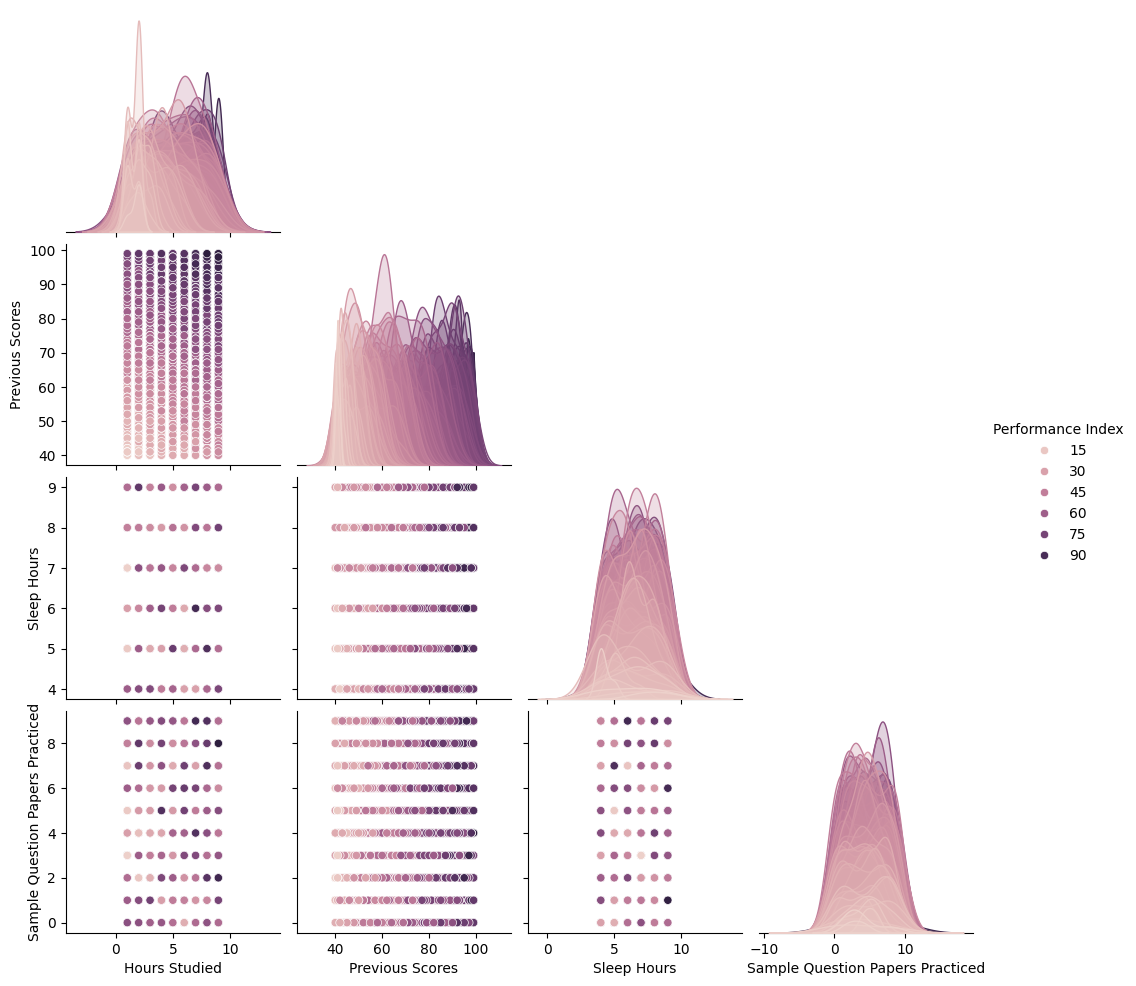

In [35]:
# we can also see the previous scores vs hours studied, how smooth the gradient is from bottom left to top right
sns.pairplot(df_sample, corner=True, hue="Performance Index")

Let's try also sample question papers practiced, not expecting much though...

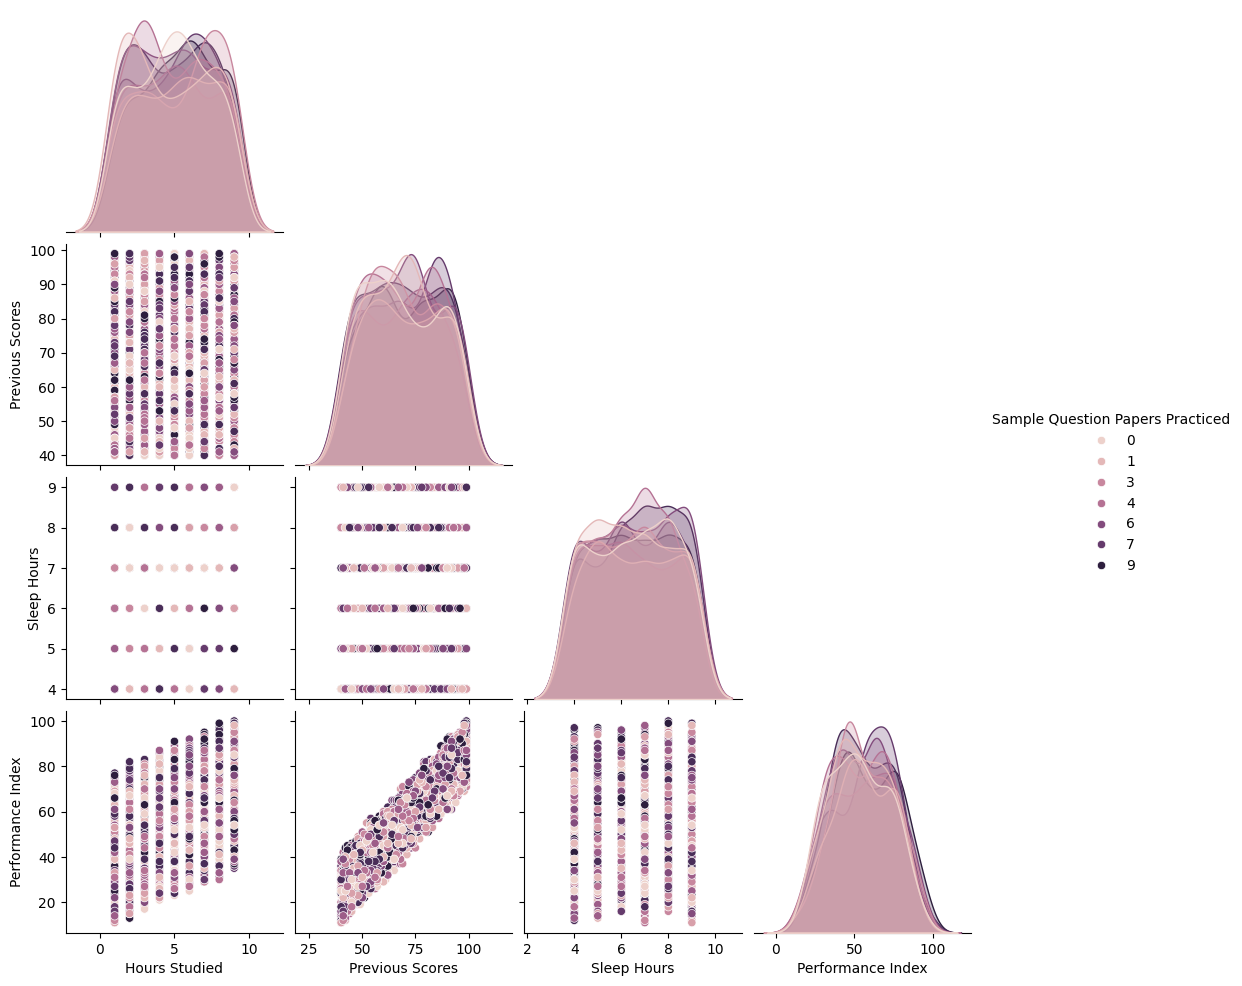

In [36]:
# we can also see the previous scores vs hours studied, how smooth the gradient is from bottom left to top right
sns.pairplot(df_sample, corner=True, hue="Sample Question Papers Practiced")

 ### Okay, so from pairplots, it seems Performance Index = Previous Scores + Hours Studied => good performance index

### Let's try some regression plots too, to see the bigger trend...

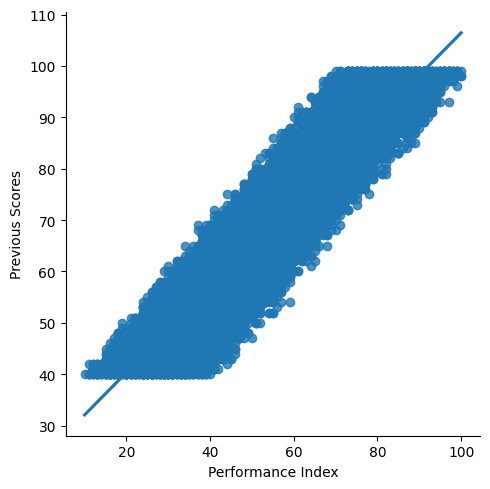

In [37]:
# basic regression, no hue, cant' see much here
sns.lmplot(x="Performance Index", y="Previous Scores", data=df)

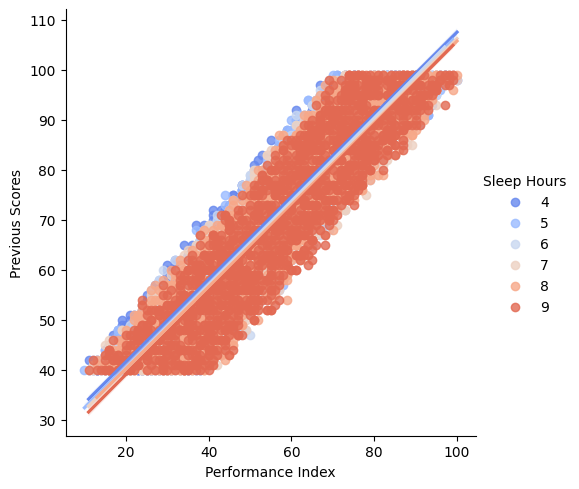

In [38]:
# nope, sleep hours doesn't affect this
sns.lmplot(x="Performance Index", y="Previous Scores", data=df, hue="Sleep Hours", palette="coolwarm")

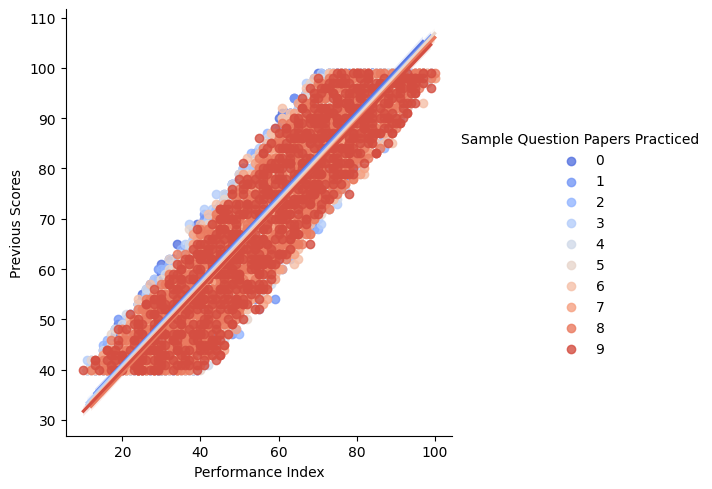

In [39]:
# also sample question papers doesn't affect this
sns.lmplot(x="Performance Index", y="Previous Scores", data=df, hue="Sample Question Papers Practiced", palette="coolwarm")

### This one regression plot is basically the answer to this dataset, or "how it works"

**This is also a synthetic example dataset since the trends and connections are extremely clear and separated**

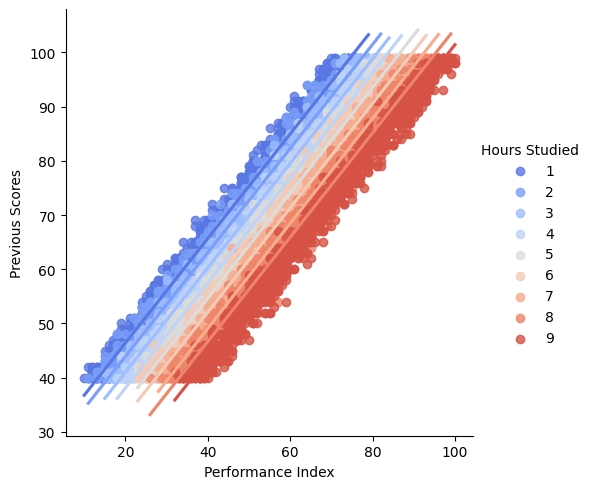

In [40]:
# yeah, this is the "jackpot", shows exactly how previous scores + hours studied are formulating the "performance index"
sns.lmplot(x="Performance Index", y="Previous Scores", data=df, hue="Hours Studied", palette="coolwarm")

### The correlation matrix matches our findings as well!

<Axes: >

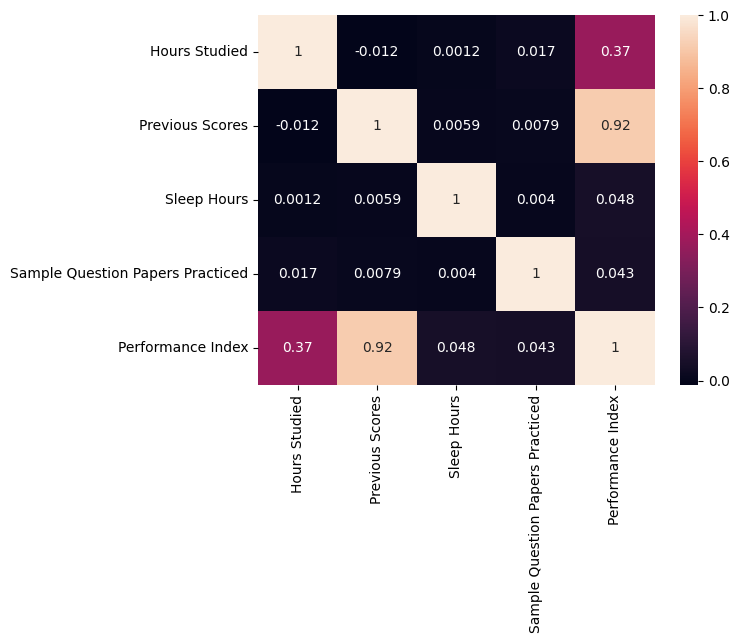

In [41]:
# correlations
correlations = df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True)

### Let's use some boxplots, however, nothing too remarkable can be found here...

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

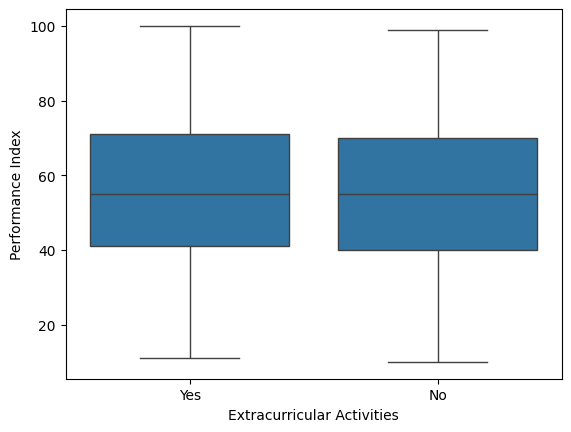

In [42]:
# not really a difference here
sns.boxplot(x="Extracurricular Activities", y="Performance Index", data=df)

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

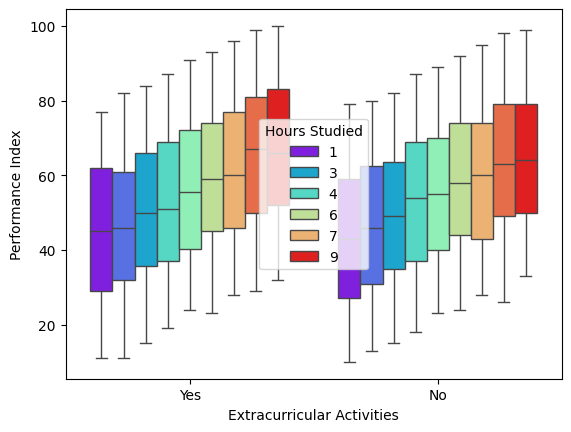

In [43]:
# no differences between extracurricular activities
sns.boxplot(x="Extracurricular Activities", y="Performance Index", data=df, hue="Hours Studied", palette="rainbow")

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

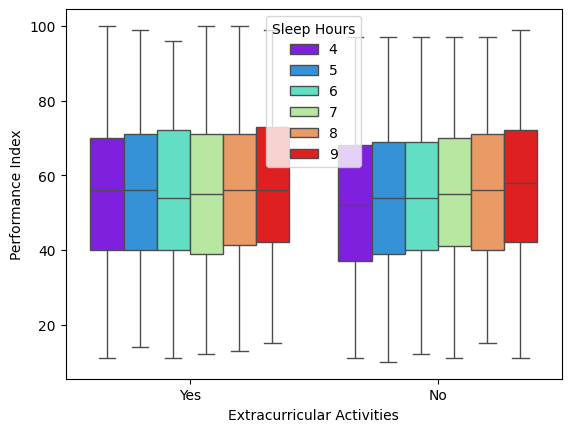

In [44]:
# not much is seen here, no effect...
sns.boxplot(x="Extracurricular Activities", y="Performance Index", data=df, hue="Sleep Hours", palette="rainbow")

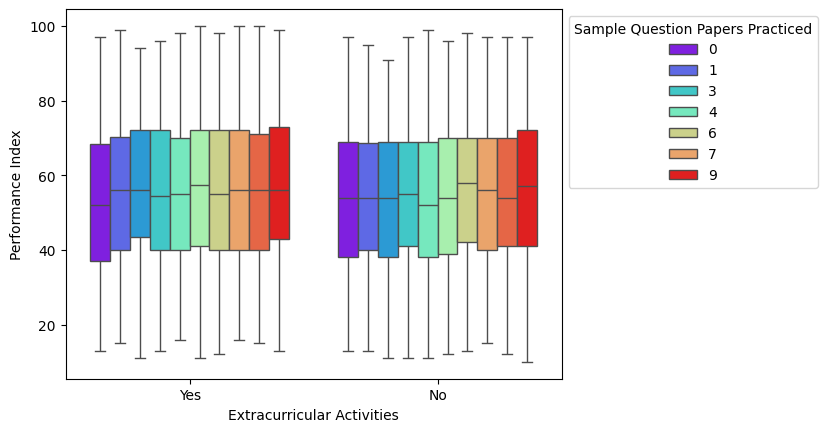

In [45]:
# example on how to move the legend on the side
ax = sns.boxplot(x="Extracurricular Activities", y="Performance Index", data=df, hue="Sample Question Papers Practiced", palette="rainbow")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))